In [3]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
accepts = pd.read_csv('accepts.csv').dropna()
accepts

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75
5,8712513,16979,0,2000.0,DODGE,Y,2.0,15.0,136.0,4.0,...,26272.72,26375.0,0.00,36,26272.72,100.0,5400.00,1.0,0,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2291068,10005156,0,1997.0,PORSCHE,N,0.0,21.0,417.0,4.0,...,0.00,31000.0,0.00,36,31000.00,100.0,5000.00,45000.0,1,4.75
5841,7647192,10005616,0,2000.0,TOYOTA,Y,2.0,8.0,62.0,5.0,...,24970.00,22024.0,0.00,60,24970.00,117.0,2400.00,21.0,0,4.75
5842,5993246,10006591,0,1997.0,CHEVROLET,N,0.0,6.0,30.0,4.0,...,20949.00,18950.0,0.00,36,20949.00,113.0,1837.50,25000.0,1,4.75
5843,4766566,10010208,0,1999.0,MERCURY,N,0.0,9.0,67.0,7.0,...,22400.00,28700.0,5300.00,48,17100.00,60.0,28000.00,0.0,0,4.75


In [4]:
def divMy(x,y):
    import numpy as np
    if x==np.nan or y==np.nan:
        return np.nan
    elif y==0:
        return -1
    else:
        return x/y
divMy(1,2)

0.5

In [5]:
##历史负债收入比:tot_rev_line/tot_income
accepts["dti_hist"]=accepts[["tot_rev_line","tot_income"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)
##本次新增负债收入比:loan_amt/tot_income
accepts["dti_mew"]=accepts[["loan_amt","tot_income"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)
##本次贷款首付比例:down_pyt/loan_amt
accepts["fta"]=accepts[["down_pyt","loan_amt"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)
##新增债务比:loan_amt/tot_rev_debt
accepts["nth"]=accepts[["loan_amt","tot_rev_debt"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)
##新增债务额度比:loan_amt/tot_rev_line
accepts["nta"]=accepts[["loan_amt","tot_rev_line"]].apply(lambda x:divMy(x[0],x[1]),axis = 1)

accepts.head()

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,ltv,tot_income,veh_mileage,used_ind,weight,dti_hist,dti_mew,fta,nth,nta
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,99.0,6550.00,24000.0,1,1.00,0.076336,2.625954,0.000000,33.992095,34.400000
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,99.0,4666.67,22.0,0,4.75,12.265920,4.197541,0.034895,0.566061,0.342212
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,118.0,1500.00,10000.0,1,1.00,3.964000,7.200000,0.286944,2.687236,1.816347
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,122.0,4144.00,14.0,0,4.75,0.434363,6.353292,0.000000,-1.000000,14.626689
5,8712513,16979,0,2000.0,DODGE,Y,2.0,15.0,136.0,4.0,...,100.0,5400.00,1.0,0,4.75,1.064259,4.865319,0.000000,7.196034,4.571554


In [6]:
cross_table = pd.crosstab(accepts.used_ind,accepts.bad_ind, margins=True)
#cross_table = pd.crosstab(accepts.bankruptcy_ind,accepts.bad_ind, margins=True)
cross_table

bad_ind,0,1,All
used_ind,,,
0,1457,306,1763
1,1862,480,2342
All,3319,786,4105


In [7]:
print('''chisq = %6.4f 
p-value = %6.4f
dof = %i 
expected_freq = %s'''  %stats.chi2_contingency(cross_table.iloc[:2, :2]))

chisq = 6.1988 
p-value = 0.0128
dof = 1 
expected_freq = [[1425.4316687  337.5683313]
 [1893.5683313  448.4316687]]


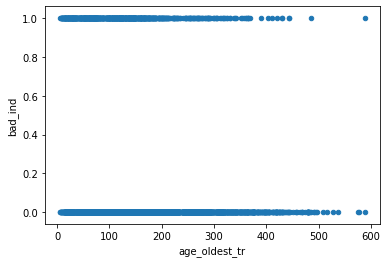

In [8]:
accepts.plot(x='age_oldest_tr', y='bad_ind', kind='scatter')

### 随机抽样，建立训练集与测试集

In [9]:
train = accepts.sample(frac=0.7, random_state=1234).copy()
test = accepts[~ accepts.index.isin(train.index)].copy()
print(' 训练集样本量: %i \n 测试集样本量: %i' %(len(train), len(test)))

 训练集样本量: 2874 
 测试集样本量: 1231


In [10]:
lg = smf.glm('bad_ind ~ age_oldest_tr', data=train, 
             family=sm.families.Binomial(sm.families.links.logit)).fit()
lg.summary()

D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                bad_ind   No. Observations:                 2874
Model:                            GLM   Df Residuals:                     2872
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1347.1
Date:                Sun, 24 Nov 2019   Deviance:                       2694.1
Time:                        15:16:54   Pearson chi2:                 3.00e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5024      0.092     -5.457      0.000      -0.683      -0.322
age_oldest_tr    -0.0063      0.001    -10.510      0.000      -0.008      -0.005
=================================================================================
"""

In [11]:
train['proba'] = lg.predict(train)
test['proba'] = lg.predict(test)

test['proba'].head(10)

4     0.238307
6     0.065840
10    0.148619
11    0.267025
13    0.283468
16    0.277072
20    0.051232
22    0.236012
35    0.147021
43    0.052479
Name: proba, dtype: float64

In [12]:
test['prediction'] = (test['proba'] > 0.3).astype('int')
pd.crosstab(test.bad_ind, test.prediction, margins=True)
acc = sum(test['prediction'] == test['bad_ind']) /np.float(len(test))
print('The accurancy is %.2f' %acc)


The accurancy is 0.77


In [13]:
for i in np.arange(0.02, 0.3, 0.02):
    prediction = (test['proba'] > i).astype('int')
    confusion_matrix = pd.crosstab(prediction,test.bad_ind,
                                   margins = True)
    precision = confusion_matrix.ix[0, 0] /confusion_matrix.ix['All', 0]
    recall = confusion_matrix.ix[0, 0] / confusion_matrix.ix[0, 'All']
    Specificity = confusion_matrix.ix[1, 1] /confusion_matrix.ix[1,'All']
    f1_score = 2 * (precision * recall) / (precision + recall)
    print('threshold: %s, precision: %.2f, recall:%.2f ,Specificity:%.2f , f1_score:%.2f'%(i, precision, recall, Specificity,f1_score))

D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


threshold: 0.02, precision: 0.00, recall:1.00 ,Specificity:0.19 , f1_score:0.01
threshold: 0.04, precision: 0.02, recall:0.94 ,Specificity:0.19 , f1_score:0.03
threshold: 0.06, precision: 0.05, recall:0.91 ,Specificity:0.19 , f1_score:0.10
threshold: 0.08, precision: 0.09, recall:0.89 ,Specificity:0.19 , f1_score:0.16
threshold: 0.1, precision: 0.14, recall:0.88 ,Specificity:0.20 , f1_score:0.25
threshold: 0.12000000000000001, precision: 0.22, recall:0.89 ,Specificity:0.20 , f1_score:0.35
threshold: 0.13999999999999999, precision: 0.29, recall:0.89 ,Specificity:0.21 , f1_score:0.43
threshold: 0.16, precision: 0.38, recall:0.88 ,Specificity:0.22 , f1_score:0.53
threshold: 0.18, precision: 0.48, recall:0.86 ,Specificity:0.23 , f1_score:0.62
threshold: 0.19999999999999998, precision: 0.58, recall:0.86 ,Specificity:0.24 , f1_score:0.69
threshold: 0.22, precision: 0.69, recall:0.85 ,Specificity:0.26 , f1_score:0.76
threshold: 0.24, precision: 0.76, recall:0.84 ,Specificity:0.26 , f1_score:0

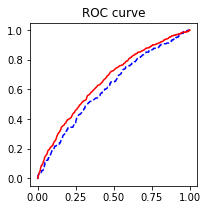

In [14]:
import sklearn.metrics as metrics

fpr_test, tpr_test, th_test = metrics.roc_curve(test.bad_ind, test.proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(train.bad_ind, train.proba)

plt.figure(figsize=[3, 3])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

In [15]:
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test))

AUC = 0.6136


In [16]:
formula = '''bad_ind ~ C(used_ind)'''

lg_m = smf.glm(formula=formula, data=train, 
             family=sm.families.Binomial(sm.families.links.logit)).fit()
lg_m.summary()

D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                bad_ind   No. Observations:                 2874
Model:                            GLM   Df Residuals:                     2872
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1411.6
Date:                Sun, 24 Nov 2019   Deviance:                       2823.2
Time:                        15:19:13   Pearson chi2:                 2.87e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5247      0.075    -20.447      0.000      -1.671      -1.379
C(used_ind)[T.1]     0.1692      0.096      1.756      0.079      -0.020       0.358
====================================================================================
"""

In [17]:
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = smf.glm(
                formula=formula, data=data, 
                family=sm.families.Binomial(sm.families.links.logit)
            ).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = smf.glm(
        formula=formula, data=data, 
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
    return(model)

In [22]:
candidates = ['bad_ind','tot_derog','age_oldest_tr','tot_open_tr','rev_util','fico_score','loan_term','ltv',
              'veh_mileage','dti_hist','dti_mew','fta','nth','nta']
data_for_select = train[candidates]

lg_m1 = forward_select(data=data_for_select, response='bad_ind')
lg_m1.summary()

D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  del sys.path[0]


aic is 2539.65259738261,continuing!
aic is 2448.9722277457986,continuing!
aic is 2406.5983198124773,continuing!
aic is 2401.0559077596185,continuing!
aic is 2397.8249140811195,continuing!
aic is 2395.437268476122,continuing!
aic is 2394.181908138009,continuing!
aic is 2393.010378559502,continuing!
forward selection over!
final formula is bad_ind ~ fico_score + ltv + age_oldest_tr + tot_derog + nth + tot_open_tr + veh_mileage + rev_util 


D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.


In [19]:
def vif(df, col_i):
    from statsmodels.formula.api import ols
    
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [20]:
candidates = ['bad_ind','fico_score','ltv','age_oldest_tr','tot_derog','nth','tot_open_tr','veh_mileage','rev_util']
exog = train[candidates].drop(['bad_ind'], axis=1)

for i in exog.columns:
    print(i, '\t', vif(df=exog, col_i=i))

fico_score 	 1.646163220064488
ltv 	 1.029828922728744
age_oldest_tr 	 1.2506968677701895
tot_derog 	 1.3754141199175398
nth 	 1.0161026681265695
tot_open_tr 	 1.1363305769422307
veh_mileage 	 1.0145653548091376
rev_util 	 1.0872910641795441


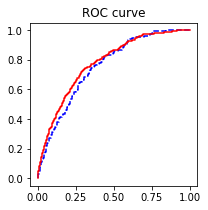

In [23]:
train['proba'] = lg_m1.predict(train)
test['proba'] = lg_m1.predict(test)
import sklearn.metrics as metrics

fpr_test, tpr_test, th_test = metrics.roc_curve(test.bad_ind, test.proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(train.bad_ind, train.proba)

plt.figure(figsize=[3, 3])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

In [24]:
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test))

AUC = 0.7518


In [25]:
formula = '''bad_ind ~ fico_score+ltv+age_oldest_tr+tot_derog+nth+tot_open_tr+veh_mileage+rev_util+C(bankruptcy_ind)'''
lg_m = smf.glm(formula=formula, data=train, 
             family=sm.families.Binomial(sm.families.links.logit)).fit()
lg_m.summary()

D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                bad_ind   No. Observations:                 2874
Model:                            GLM   Df Residuals:                     2864
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1184.5
Date:                Sat, 23 Nov 2019   Deviance:                       2368.9
Time:                        16:15:56   Pearson chi2:                 2.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.4584      0.853      6.398      0.000       3.786       7.131
C(bankruptcy_ind)[T.Y]    -0.4738      0.197     -2.406      0.016      -0.860      -0.088
fico_score                -0.0137      0.001    -11.347      0.000      -0.016      -0.011
ltv                        0.0292      0.003      8.596      0.000       0.023       0.036
age_oldest_tr             -0.0038      0.001     -5.649      0.000      -0.005      -0.002
tot_derog                  0.0484      0.016      2.969      0.003       0.016       0.080
nth                        0.0004      0.000      2.302      0.021     5.5e-05       0.001
tot_open_tr               -0.0376      0.017     -2.155      0.031      -0.072      -0.003
veh_mileage              2.52e-06    1.5e-06      1.683      0.092   -4.14e-07    5.45e-06
rev_util                   0.0009      0.001      1.673      0.094      -0.000       0.002
==========================================================================================
"""